## Titanic Dataset – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis (EDA) on the Titanic dataset to understand key factors influencing passenger survival. .

In [1]:
import pandas as pd

In [ ]:
# Data Loading
train_data = pd.read_csv('../Data/train.csv')

## EDA - Survival by Sex

### Initial Data Overview

In [6]:
train_data.shape

(891, 12)

In [8]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
train_data['Survived'].unique()

array([0, 1])

In [ ]:
train_data['Sex'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
#checking for missing values
train_data['Sex'].isna().sum()

np.int64(0)

In [18]:
#checking for missing values
train_data['Survived'].isna().sum()

np.int64(0)

**Observation:**  
The `Sex` column contains two categories (`male`, `female`) and has no missing values. The `Survived` column contains two categories (`0`, `1`), where 0 - indicates non-survival, 1 -  indicates survival. The `Survived` column has no missing values. No inconsistencies were observed, so the feature is ready for analysis.

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Calculate survival rate by sex
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()

print(survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Visualization

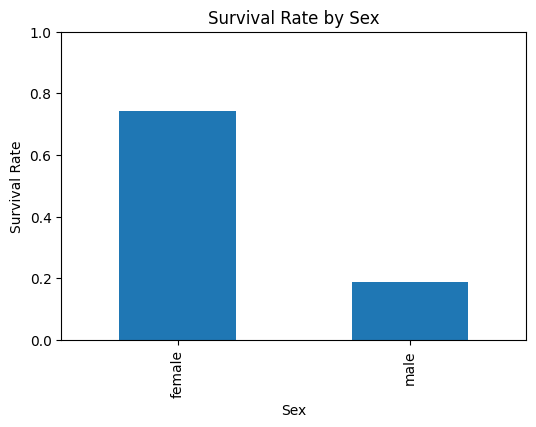

In [21]:
# Plot
plt.figure(figsize=(6, 4))
survival_by_sex.plot(kind='bar')

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)
plt.show()

**Summary:**  
The visualization shows a substantial difference in survival rates between genders. Female passengers had a significantly higher survival rate than male passengers, which aligns with the historical “women and children first” evacuation policy. This indicates that `Sex` is a strong predictor of survival.
